In [18]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE"
data = "Rh160_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_96.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9008.139053 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 3.42249e-47 0.00130746
Total flux = 2.243694 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9077.464542 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000667849
Total flux = 1.691762 Jy at 230 GHz
166:20:25.430 - Start Program


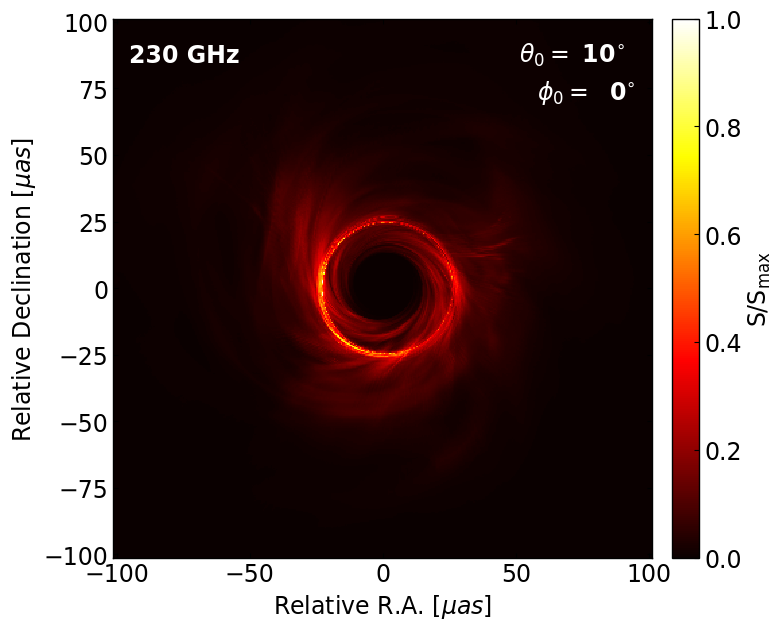

In [8]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [19]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE
96, flux: 2.026118 at 9008.139053
97, flux: 2.053357 at 9017.844868
98, flux: 2.075643 at 9027.551100
99, flux: 2.115434 at 9038.646851
100, flux: 2.111824 at 9048.356431
101, flux: 2.128561 at 9058.061637
102, flux: 2.108884 at 9067.764826
103, flux: 2.059831 at 9077.464542
104, flux: 2.104065 at 9088.552963
105, flux: 2.118269 at 9098.254801
106, flux: 2.090076 at 9107.957635
107, flux: 2.103995 at 9117.659184
108, flux: 2.082593 at 9127.363548
109, flux: 2.067905 at 9138.452062
110, flux: 2.080450 at 9148.158890
111, flux: 2.078132 at 9157.868704
112, flux: 2.008212 at 9167.579583
113, flux: 1.892183 at 9178.672003
114, flux: 1.858088 at 9188.377169
115, flux: 1.872270 at 9198.079088
116, flux: 1.962470 at 9207.781556
117, flux: 2.039470 at 9217.482565
118, flux: 2.163950 at 9228.573654
119, flux: 2.274282 at 9238.281441
120, flux: 2.398172 at 9247.990304
121, flux: 2.393154 at 9257.698128
122, flu

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.027693 Jy, the density scale = 3.270000e-18


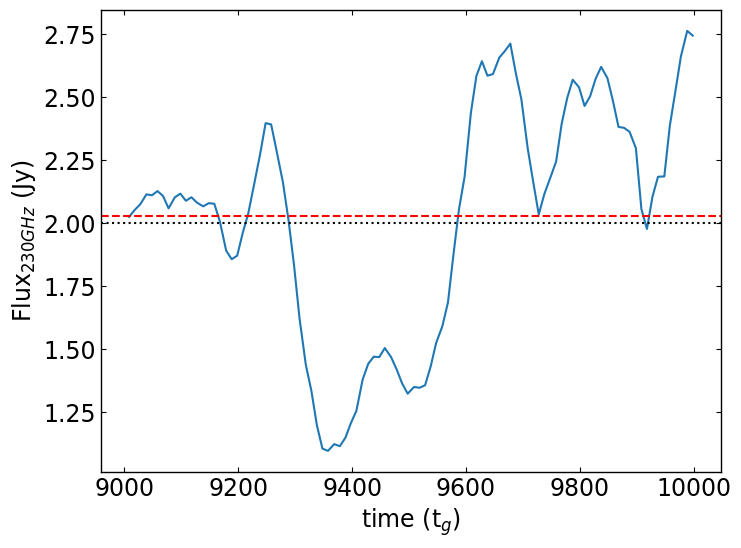

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.026118 Jy at 9008.139053
97:: 2.053357 Jy at 9017.844868
98:: 2.075643 Jy at 9027.551100
99:: 2.115434 Jy at 9038.646851
100:: 2.111824 Jy at 9048.356431
101:: 2.128561 Jy at 9058.061637
102:: 2.108884 Jy at 9067.764826
103:: 2.059831 Jy at 9077.464542
104:: 2.104065 Jy at 9088.552963
105:: 2.118269 Jy at 9098.254801
106:: 2.090076 Jy at 9107.957635
107:: 2.103995 Jy at 9117.659184
108:: 2.082593 Jy at 9127.363548
109:: 2.067905 Jy at 9138.452062
110:: 2.080450 Jy at 9148.158890
111:: 2.078132 Jy at 9157.868704
112:: 2.008212 Jy at 9167.579583
113:: 1.892183 Jy at 9178.672003
114:: 1.858088 Jy at 9188.377169
115:: 1.872270 Jy at 9198.079088
116:: 1.962470 Jy at 9207.781556
117:: 2.039470 Jy at 9217.482565
118:: 2.163950 Jy at 9228.573654
119:: 2.274282 Jy at 9238.281441
120:: 2.398172 Jy at 9247.990304
121:: 2.393154 Jy at 9257.698128
122:: 2.286997 Jy at 9267.401850
123:: 2.162050 Jy at 9278.487308
124:: 2.013946 Jy at 9288.189770
125:: 1.834917 Jy at 9297.894634
126:: 1.622585

In [24]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE
96, flux: 2.038596 at 9008.139053
97, flux: 2.058374 at 9017.844868
98, flux: 2.098856 at 9027.551100
99, flux: 2.150332 at 9038.646851
100, flux: 2.140823 at 9048.356431
101, flux: 2.177085 at 9058.061637
102, flux: 2.155481 at 9067.764826
103, flux: 2.107533 at 9077.464542
104, flux: 2.156626 at 9088.552963
105, flux: 2.184073 at 9098.254801
106, flux: 2.161686 at 9107.957635
107, flux: 2.178996 at 9117.659184
108, flux: 2.170222 at 9127.363548
109, flux: 2.165855 at 9138.452062
110, flux: 2.168686 at 9148.158890
111, flux: 2.147650 at 9157.868704
112, flux: 2.088727 at 9167.579583
113, flux: 1.986253 at 9178.672003
114, flux: 1.993261 at 9188.377169
115, flux: 1.961054 at 9198.079088
116, flux: 2.007248 at 9207.781556
117, flux: 2.069990 at 9217.482565
118, flux: 2.219689 at 9228.573654
119, flux: 2.351544 at 9238.281441
120, flux: 2.466968 at 9247.990304
121, flux: 2.467684 at 9257.698128
122, flu

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.980199 Jy, the density scale = 3.200000e-18


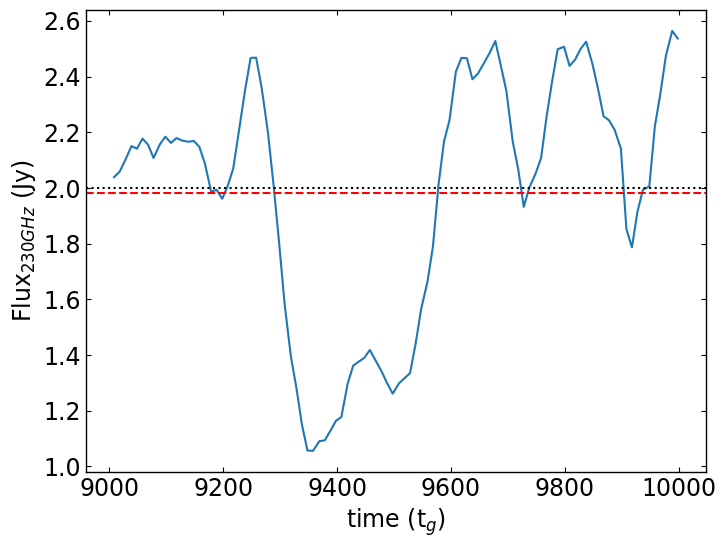

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.038596 Jy at 9008.139053
97:: 2.058374 Jy at 9017.844868
98:: 2.098856 Jy at 9027.551100
99:: 2.150332 Jy at 9038.646851
100:: 2.140823 Jy at 9048.356431
101:: 2.177085 Jy at 9058.061637
102:: 2.155481 Jy at 9067.764826
103:: 2.107533 Jy at 9077.464542
104:: 2.156626 Jy at 9088.552963
105:: 2.184073 Jy at 9098.254801
106:: 2.161686 Jy at 9107.957635
107:: 2.178996 Jy at 9117.659184
108:: 2.170222 Jy at 9127.363548
109:: 2.165855 Jy at 9138.452062
110:: 2.168686 Jy at 9148.158890
111:: 2.147650 Jy at 9157.868704
112:: 2.088727 Jy at 9167.579583
113:: 1.986253 Jy at 9178.672003
114:: 1.993261 Jy at 9188.377169
115:: 1.961054 Jy at 9198.079088
116:: 2.007248 Jy at 9207.781556
117:: 2.069990 Jy at 9217.482565
118:: 2.219689 Jy at 9228.573654
119:: 2.351544 Jy at 9238.281441
120:: 2.466968 Jy at 9247.990304
121:: 2.467684 Jy at 9257.698128
122:: 2.359425 Jy at 9267.401850
123:: 2.198286 Jy at 9278.487308
124:: 2.013002 Jy at 9288.189770
125:: 1.807049 Jy at 9297.894634
126:: 1.585313

In [29]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE
96, flux: 2.070129 at 9008.139053
97, flux: 2.092285 at 9017.844868
98, flux: 2.144458 at 9027.551100
99, flux: 2.196923 at 9038.646851
100, flux: 2.193518 at 9048.356431
101, flux: 2.246637 at 9058.061637
102, flux: 2.237251 at 9067.764826
103, flux: 2.187049 at 9077.464542
104, flux: 2.276920 at 9088.552963
105, flux: 2.361495 at 9098.254801
106, flux: 2.344876 at 9107.957635
107, flux: 2.350585 at 9117.659184
108, flux: 2.368909 at 9127.363548
109, flux: 2.341447 at 9138.452062
110, flux: 2.349025 at 9148.158890
111, flux: 2.272253 at 9157.868704
112, flux: 2.227984 at 9167.579583
113, flux: 2.142635 at 9178.672003
114, flux: 2.107691 at 9188.377169
115, flux: 1.994148 at 9198.079088
116, flux: 2.030440 at 9207.781556
117, flux: 2.123611 at 9217.482565
118, flux: 2.301330 at 9228.573654
119, flux: 2.474448 at 9238.281441
120, flux: 2.596447 at 9247.990304
121, flux: 2.580951 at 9257.698128
122, flu

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.002414 Jy, the density scale = 3.170000e-18


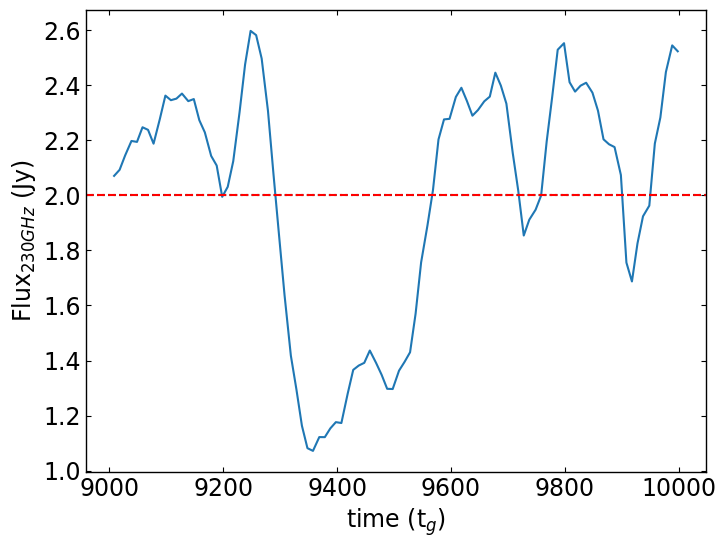

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.070129 Jy at 9008.139053
97:: 2.092285 Jy at 9017.844868
98:: 2.144458 Jy at 9027.551100
99:: 2.196923 Jy at 9038.646851
100:: 2.193518 Jy at 9048.356431
101:: 2.246637 Jy at 9058.061637
102:: 2.237251 Jy at 9067.764826
103:: 2.187049 Jy at 9077.464542
104:: 2.276920 Jy at 9088.552963
105:: 2.361495 Jy at 9098.254801
106:: 2.344876 Jy at 9107.957635
107:: 2.350585 Jy at 9117.659184
108:: 2.368909 Jy at 9127.363548
109:: 2.341447 Jy at 9138.452062
110:: 2.349025 Jy at 9148.158890
111:: 2.272253 Jy at 9157.868704
112:: 2.227984 Jy at 9167.579583
113:: 2.142635 Jy at 9178.672003
114:: 2.107691 Jy at 9188.377169
115:: 1.994148 Jy at 9198.079088
116:: 2.030440 Jy at 9207.781556
117:: 2.123611 Jy at 9217.482565
118:: 2.301330 Jy at 9228.573654
119:: 2.474448 Jy at 9238.281441
120:: 2.596447 Jy at 9247.990304
121:: 2.580951 Jy at 9257.698128
122:: 2.496123 Jy at 9267.401850
123:: 2.306201 Jy at 9278.487308
124:: 2.075959 Jy at 9288.189770
125:: 1.855587 Jy at 9297.894634
126:: 1.637282

In [34]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE
96, flux: 2.137126 at 9008.139053
97, flux: 2.140879 at 9017.844868
98, flux: 2.172102 at 9027.551100
99, flux: 2.206305 at 9038.646851
100, flux: 2.191171 at 9048.356431
101, flux: 2.236597 at 9058.061637
102, flux: 2.243803 at 9067.764826
103, flux: 2.201494 at 9077.464542
104, flux: 2.320859 at 9088.552963
105, flux: 2.428209 at 9098.254801
106, flux: 2.452238 at 9107.957635
107, flux: 2.470140 at 9117.659184
108, flux: 2.471518 at 9127.363548
109, flux: 2.480743 at 9138.452062
110, flux: 2.495270 at 9148.158890
111, flux: 2.438131 at 9157.868704
112, flux: 2.334485 at 9167.579583
113, flux: 2.142561 at 9178.672003
114, flux: 2.133615 at 9188.377169
115, flux: 2.044837 at 9198.079088
116, flux: 2.134418 at 9207.781556
117, flux: 2.244919 at 9217.482565
118, flux: 2.500111 at 9228.573654
119, flux: 2.724203 at 9238.281441
120, flux: 2.792030 at 9247.990304
121, flux: 2.790282 at 9257.698128
122, flu

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.026205 Jy, the density scale = 3.160000e-18


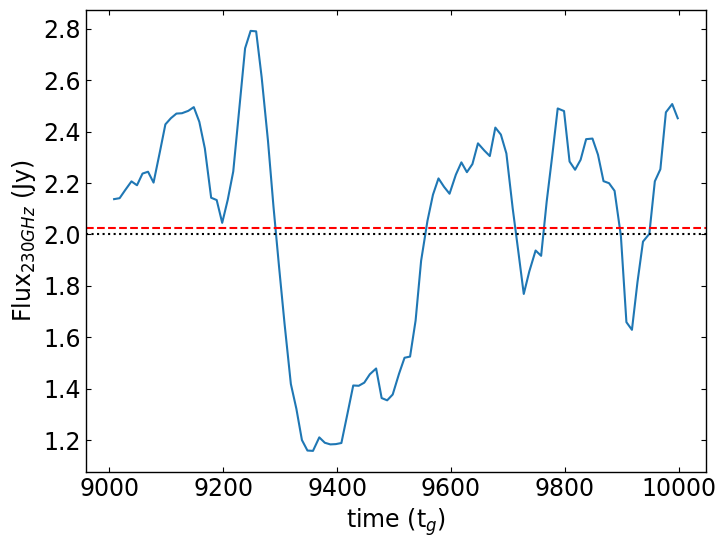

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.137126 Jy at 9008.139053
97:: 2.140879 Jy at 9017.844868
98:: 2.172102 Jy at 9027.551100
99:: 2.206305 Jy at 9038.646851
100:: 2.191171 Jy at 9048.356431
101:: 2.236597 Jy at 9058.061637
102:: 2.243803 Jy at 9067.764826
103:: 2.201494 Jy at 9077.464542
104:: 2.320859 Jy at 9088.552963
105:: 2.428209 Jy at 9098.254801
106:: 2.452238 Jy at 9107.957635
107:: 2.470140 Jy at 9117.659184
108:: 2.471518 Jy at 9127.363548
109:: 2.480743 Jy at 9138.452062
110:: 2.495270 Jy at 9148.158890
111:: 2.438131 Jy at 9157.868704
112:: 2.334485 Jy at 9167.579583
113:: 2.142561 Jy at 9178.672003
114:: 2.133615 Jy at 9188.377169
115:: 2.044837 Jy at 9198.079088
116:: 2.134418 Jy at 9207.781556
117:: 2.244919 Jy at 9217.482565
118:: 2.500111 Jy at 9228.573654
119:: 2.724203 Jy at 9238.281441
120:: 2.792030 Jy at 9247.990304
121:: 2.790282 Jy at 9257.698128
122:: 2.611396 Jy at 9267.401850
123:: 2.364389 Jy at 9278.487308
124:: 2.107499 Jy at 9288.189770
125:: 1.875099 Jy at 9297.894634
126:: 1.652423

In [39]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE
96, flux: 2.234259 at 9008.139053
97, flux: 2.189646 at 9017.844868
98, flux: 2.182949 at 9027.551100
99, flux: 2.175831 at 9038.646851
100, flux: 2.128983 at 9048.356431
101, flux: 2.098565 at 9058.061637
102, flux: 2.081015 at 9067.764826
103, flux: 2.044717 at 9077.464542
104, flux: 2.170321 at 9088.552963
105, flux: 2.304740 at 9098.254801
106, flux: 2.371020 at 9107.957635
107, flux: 2.456728 at 9117.659184
108, flux: 2.492675 at 9127.363548
109, flux: 2.512202 at 9138.452062
110, flux: 2.519515 at 9148.158890
111, flux: 2.446522 at 9157.868704
112, flux: 2.300695 at 9167.579583
113, flux: 2.168767 at 9178.672003
114, flux: 2.148055 at 9188.377169
115, flux: 2.111552 at 9198.079088
116, flux: 2.235595 at 9207.781556
117, flux: 2.329960 at 9217.482565
118, flux: 2.487135 at 9228.573654
119, flux: 2.686523 at 9238.281441
120, flux: 2.768873 at 9247.990304
121, flux: 2.750369 at 9257.698128
122, flu

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.997843 Jy, the density scale = 3.120000e-18


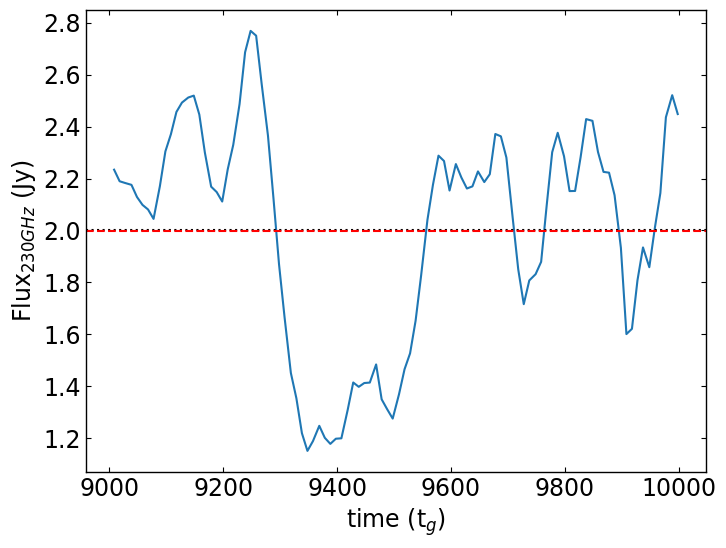

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.234259 Jy at 9008.139053
97:: 2.189646 Jy at 9017.844868
98:: 2.182949 Jy at 9027.551100
99:: 2.175831 Jy at 9038.646851
100:: 2.128983 Jy at 9048.356431
101:: 2.098565 Jy at 9058.061637
102:: 2.081015 Jy at 9067.764826
103:: 2.044717 Jy at 9077.464542
104:: 2.170321 Jy at 9088.552963
105:: 2.304740 Jy at 9098.254801
106:: 2.371020 Jy at 9107.957635
107:: 2.456728 Jy at 9117.659184
108:: 2.492675 Jy at 9127.363548
109:: 2.512202 Jy at 9138.452062
110:: 2.519515 Jy at 9148.158890
111:: 2.446522 Jy at 9157.868704
112:: 2.300695 Jy at 9167.579583
113:: 2.168767 Jy at 9178.672003
114:: 2.148055 Jy at 9188.377169
115:: 2.111552 Jy at 9198.079088
116:: 2.235595 Jy at 9207.781556
117:: 2.329960 Jy at 9217.482565
118:: 2.487135 Jy at 9228.573654
119:: 2.686523 Jy at 9238.281441
120:: 2.768873 Jy at 9247.990304
121:: 2.750369 Jy at 9257.698128
122:: 2.564627 Jy at 9267.401850
123:: 2.365218 Jy at 9278.487308
124:: 2.122878 Jy at 9288.189770
125:: 1.870168 Jy at 9297.894634
126:: 1.666454